# COMPROBAMOS ASUNCIONES
---

In [10]:
import pandas as pd

from sklearn.preprocessing import RobustScaler

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("datos/03-bikes_limpio.csv", index_col= 0).reset_index(drop= True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,registered
0,winter,0,1,1,1,0,2,18.18125,80.5833,10.749882,654
1,winter,0,2,0,4,1,2,17.68695,69.6087,16.652113,670
2,winter,0,3,0,4,1,1,9.47025,43.7273,16.636703,1229
3,spring,0,4,0,7,0,1,10.60610,59.0435,10.739832,1454
4,spring,0,5,0,2,1,1,11.46350,43.6957,12.522300,1518


### Asunción de *normalidad* de nuestra variable respuesta, **registered**

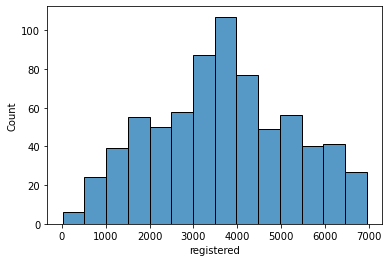

In [7]:
sns.histplot(df["registered"]);

In [9]:
stats.shapiro(df["registered"])

ShapiroResult(statistic=0.9846060872077942, pvalue=7.58412454615609e-07)

- Nuestro p-valor es menor a 0.05, con lo cual nuestros datos no son normales. **NO podemos hacer regresión lineal**

- Vamos a intentar **normalizar** la columna respuesta

Probamos con **MinMaxScaler**

In [11]:
minmax = MinMaxScaler()

In [12]:
minmax.fit(df[["registered"]])

MinMaxScaler()

In [13]:
x_norm = minmax.transform(df[["registered"]])

In [14]:
x_norm.min(axis=0)

array([0.])

In [15]:
x_norm.max(axis=0)

array([1.])

In [16]:
num_minmax = pd.DataFrame(x_norm, columns=["registered_Sklearn"])

In [17]:
df["registered_Sklearn"]= num_minmax

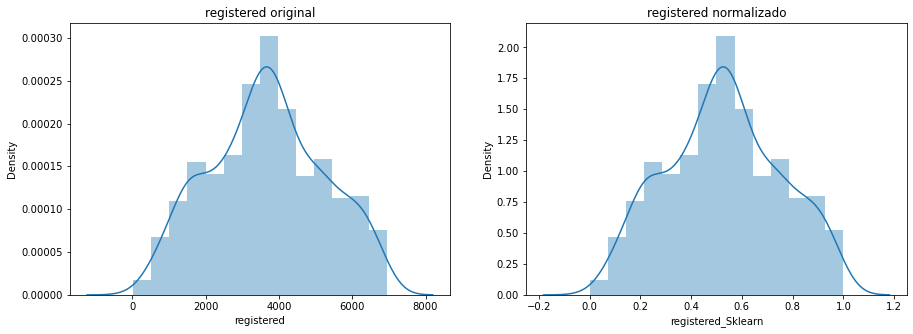

In [18]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('registered original')
axes[1].set_title('registered normalizado')

sns.distplot(df['registered'] ,ax = axes[0])
sns.distplot(df['registered_Sklearn'], ax = axes[1]);

In [19]:
stats.shapiro(df["registered_Sklearn"])

ShapiroResult(statistic=0.9846060872077942, pvalue=7.58412454615609e-07)

No conseguimos normalizar con este método

Probamos con el método **BOX-COX**:

In [20]:
df['registered_BOX'], lambda_ajustada = stats.boxcox(df['registered'])

In [21]:
stats.shapiro(df["registered_BOX"])

ShapiroResult(statistic=0.9855538606643677, pvalue=1.6291306792481919e-06)

Seguimos sin conseguir normalizar

No probamos el resto de las asunciones, ya que si no podemos normalizar la columna respuesta, no podemos hacer regresión lineal